In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd

plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 16
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

# Data Visualization and EDA

In [2]:
directory = '../input/dysarthria-detection'
data = pd.read_csv("../input/dysarthria-detection/torgo_data/data.csv")
data['filename'] = data['filename'].apply(lambda x: os.path.join(directory,x))
data

,is_dysarthria,gender,filename
0,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
1,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
2,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
3,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
4,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
...,...,...,...
1995,dysarthria,male,../input/dysarthria-detection/torgo_data/dysar...
1996,dysarthria,male,../input/dysarthria-detection/torgo_data/dysar...
1997,dysarthria,male,../input/dysarthria-detection/torgo_data/dysar...
1998,dysarthria,male,../input/dysarthria-detection/torgo_data/dysar...


## Visualization Functions: Features and Plots
- Waveplot
- Spectrogram
- Zero Crossing Rate
- Spectral Centroids
- Spectral Rolloff
- MFCCs
- Mel Spectrogram

In [3]:
def show_waveplot(audio_path,label,gender):
    x , sr = librosa.load(audio_path)
    plt.figure(figsize=(20, 6))
    librosa.display.waveshow(x, sr=sr)
    plt.title(f"Waveplot: of Class: {label}, Gender: {gender}")

def show_spectrogram(audio_path,label,gender):
    x , sr = librosa.load(audio_path)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(20,6))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz',cmap='plasma')
    plt.colorbar()
    plt.title(f"Spectrogram of Class: {label}, Gender: {gender}")
    
def show_zcr(audio_path,label,gender):
    x , sr = librosa.load(audio_path)
    zero_crossings = librosa.zero_crossings(x)
    print("Sum of zero crossing ", zero_crossings.sum())
    plt.figure(figsize=(20, 5))
    plt.title(f'Zero Crossing Rate of Class: {label}, Gender: {gender}')
    zcrs = librosa.feature.zero_crossing_rate(x)
    plt.plot(zcrs[0])
    plt.show()
    
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

def show_spectral_centroids(audio_path,label,gender):
    plt.figure(figsize=(20, 5))
    plt.title(f'Spectral Centroids of Class: {label}, Gender: {gender}')
    x , sr = librosa.load(audio_path)
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='r')
    plt.show()
    
def show_spectral_rolloff(audio_path,label,gender):
    plt.figure(figsize=(20, 5))
    plt.title(f'Spectral Rolloff of Class: {label}, Gender: {gender}')
    x , sr = librosa.load(audio_path)
    spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr, roll_percent=0.01)[0]
    frames = range(len(spectral_rolloff))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_rolloff), color='r')
    plt.show()
    
def show_mfccs(audio_path,label,gender):
    plt.figure(figsize=(20, 6))
    plt.title(f'MFCC of Class: {label}, Gender: {gender}')
    x , sr = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=x, sr=sr)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time',cmap='plasma')
    plt.show()
    
def show_melspectro(audio_path,label,gender):
    plt.figure(figsize=(20, 6))
    plt.title(f'Mel Spectro of Class: {label}, Gender: {gender}')
    x , sr = librosa.load(audio_path)
    melspectro = librosa.feature.melspectrogram(y=x, sr=sr)
    librosa.display.specshow(melspectro, sr=sr, x_axis='time',cmap='plasma')
    plt.show()  

## Fetching Audio Samples: Gender and Dysarthric Case


In [4]:
data.sample(frac=1).reset_index(drop=True,inplace=True)
male_dysarthric = data[(data['gender']=='male') & (data['is_dysarthria']=='dysarthria')].sample(1)
female_dysarthric = data[(data['gender']=='female') & (data['is_dysarthria']=='dysarthria')].sample(1)
male_ndysarthric = data[(data['gender']=='male') & (data['is_dysarthria']=='non_dysarthria')].sample(1)
female_ndysarthric = data[(data['gender']=='female') & (data['is_dysarthria']=='non_dysarthria')].sample(1)

## Male and Dysarthric

In [5]:
ipd.Audio(male_dysarthric.iloc[0].filename)

## Female and Dysarthric

In [6]:
ipd.Audio(female_dysarthric.iloc[0].filename)

## Male and Non Dysarthric

In [7]:
ipd.Audio(male_ndysarthric.iloc[0].filename)

## Female and Dysarthric

In [8]:
ipd.Audio(female_ndysarthric.iloc[0].filename)

## Waveplots


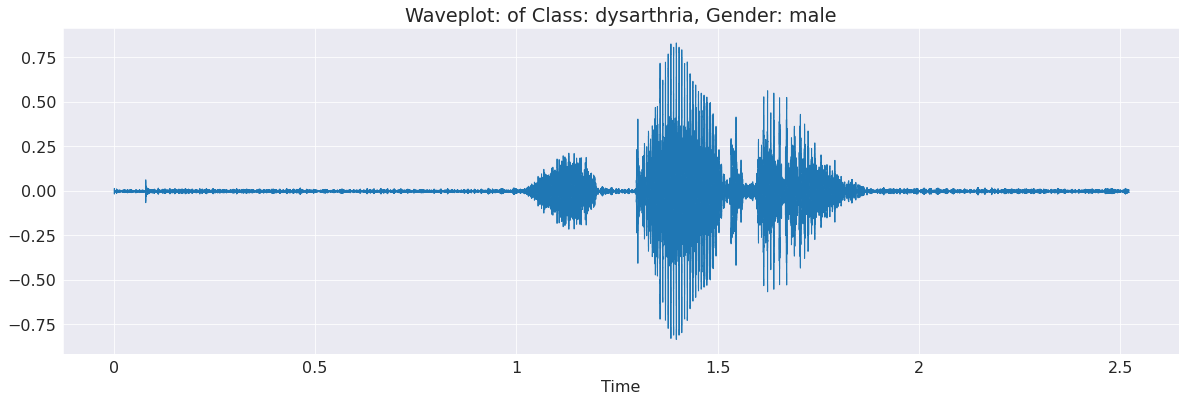

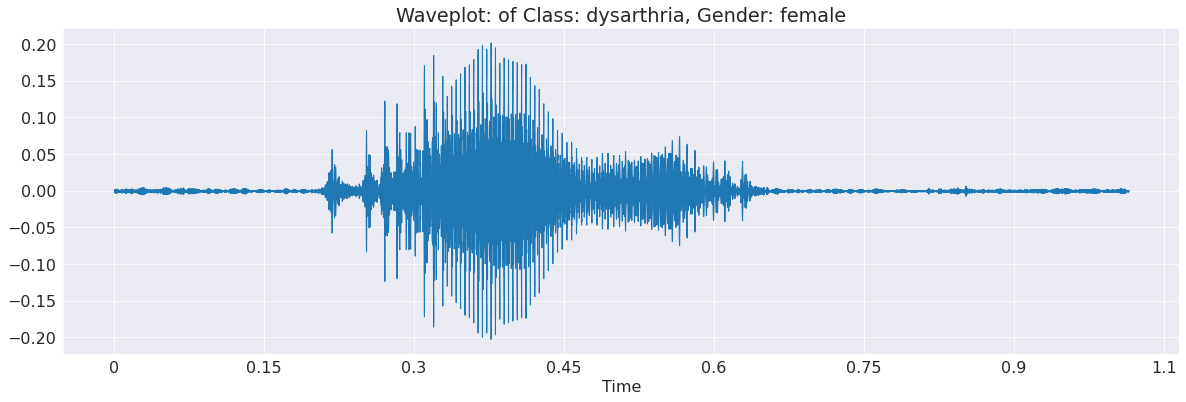

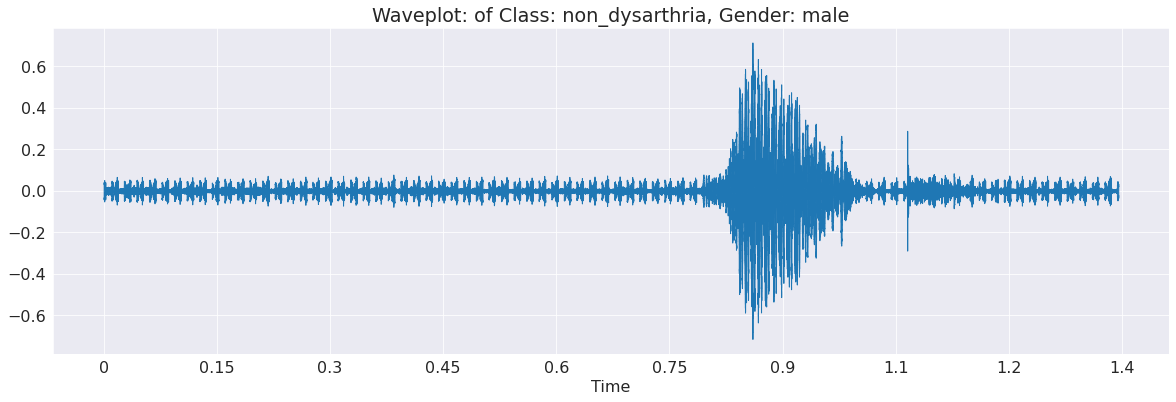

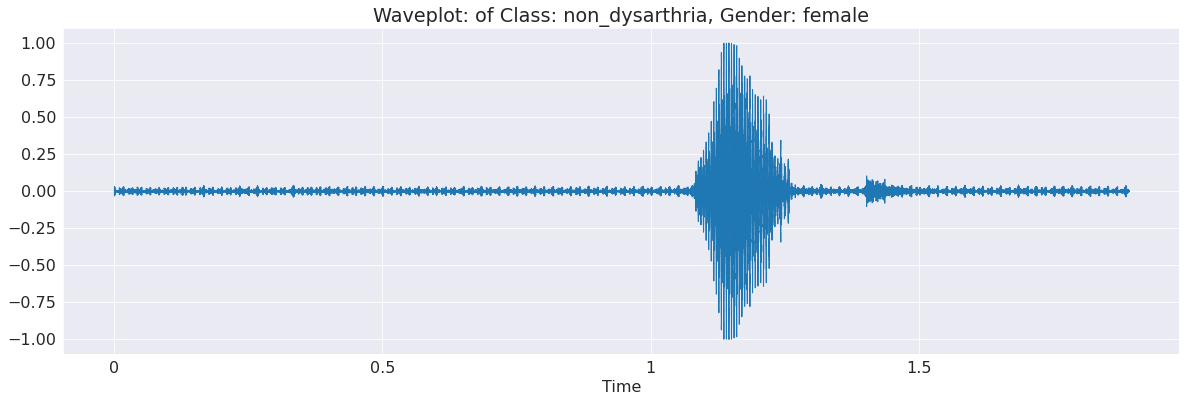

In [9]:
show_waveplot(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_waveplot(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_waveplot(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_waveplot(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

## Spectrograms


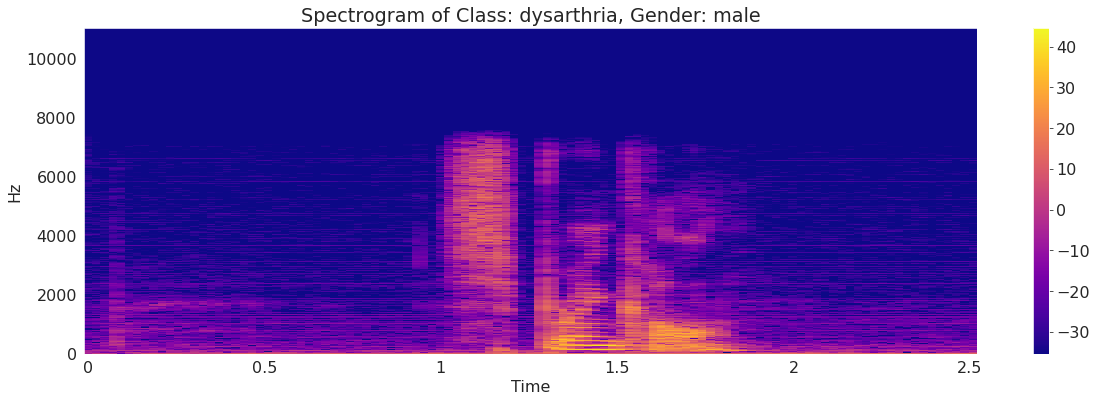

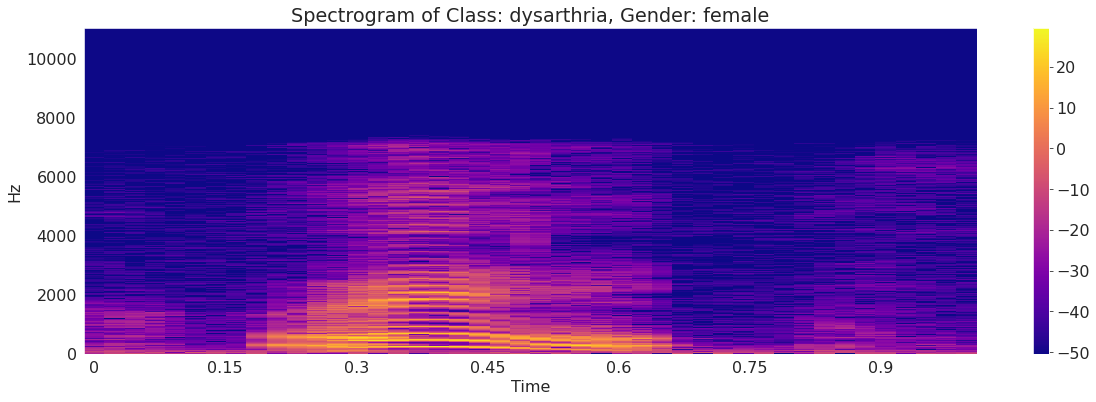

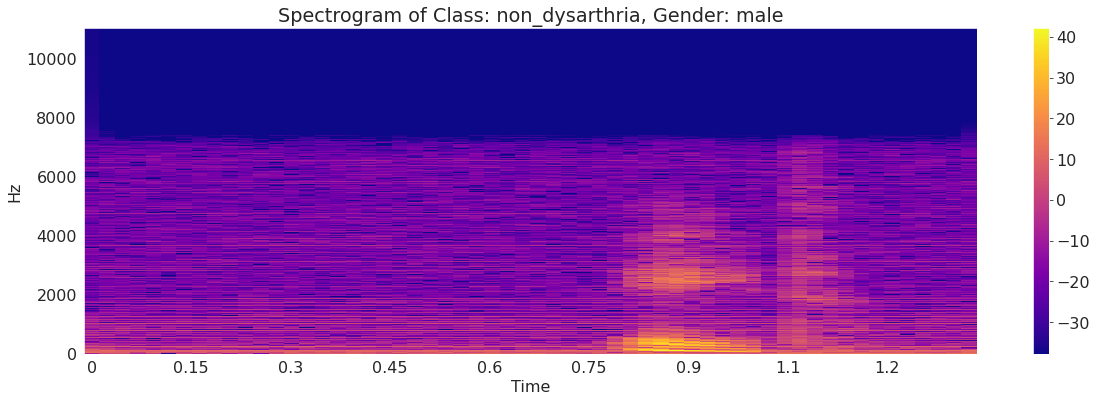

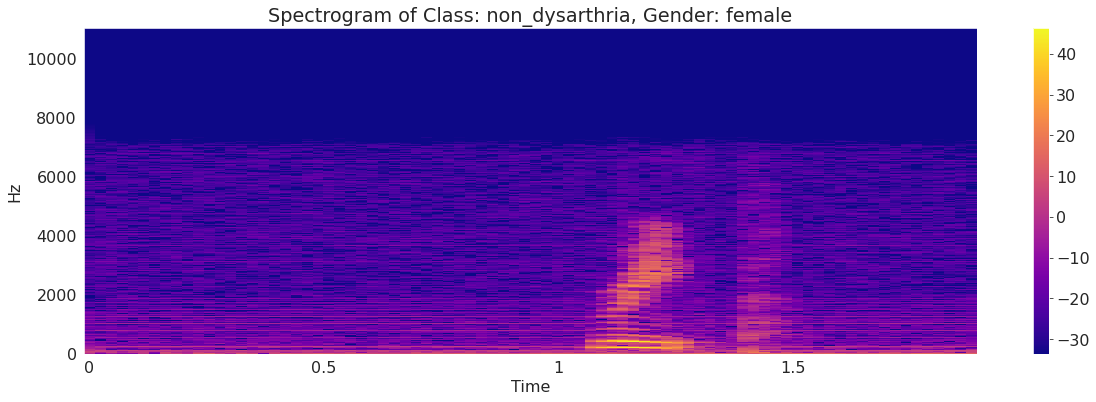

In [10]:
show_spectrogram(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_spectrogram(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_spectrogram(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_spectrogram(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

## Zero Crossing Rate


Sum of zero crossing  3531


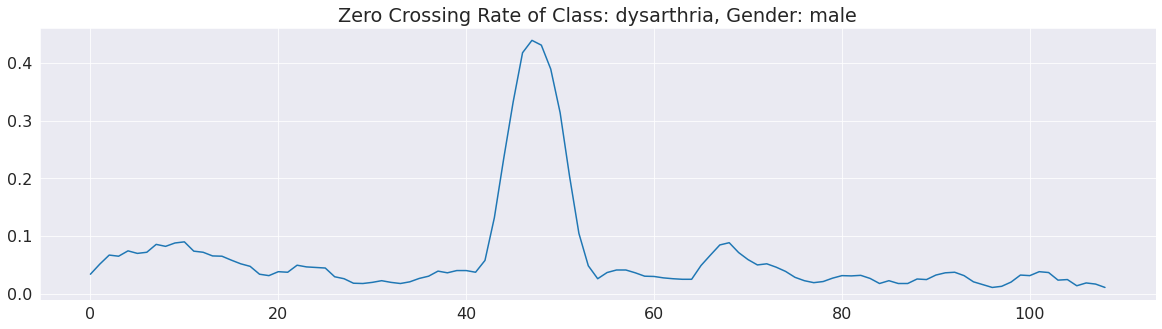

Sum of zero crossing  948


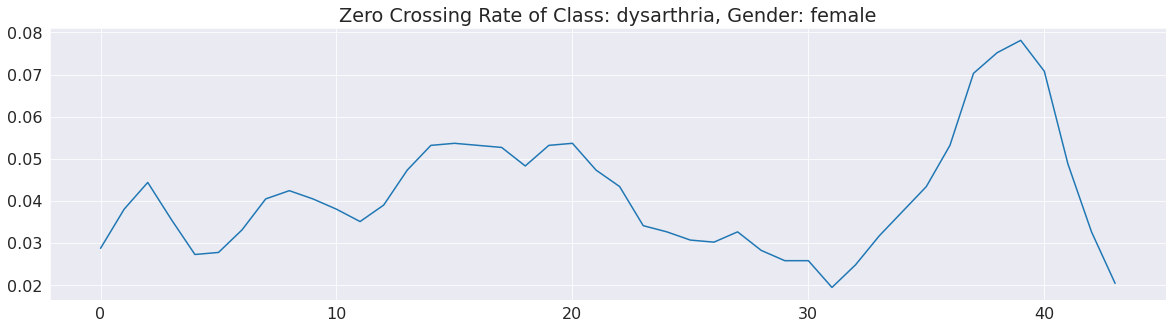

Sum of zero crossing  2318


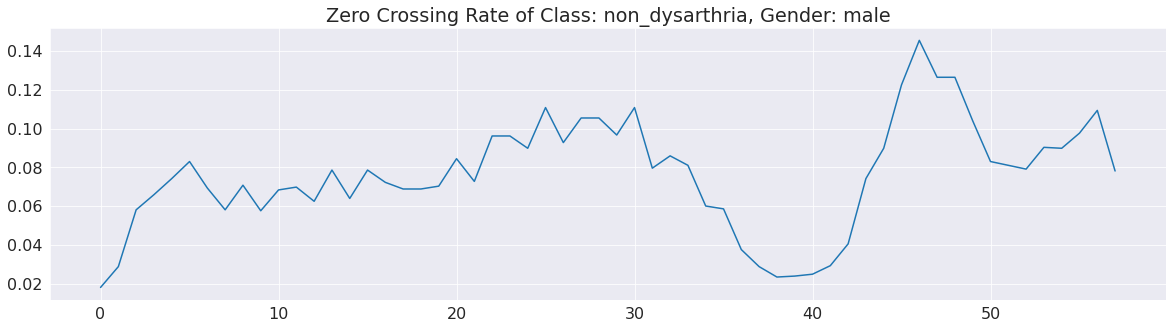

Sum of zero crossing  3036


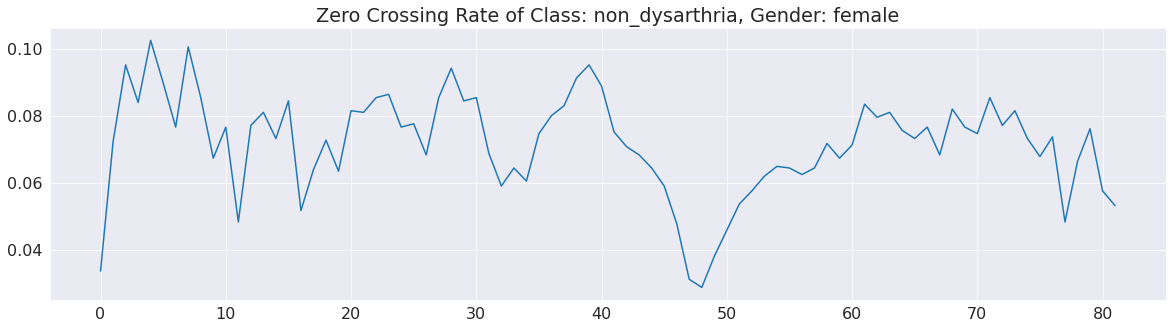

In [11]:
show_zcr(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_zcr(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_zcr(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_zcr(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

## Spectral Centroid

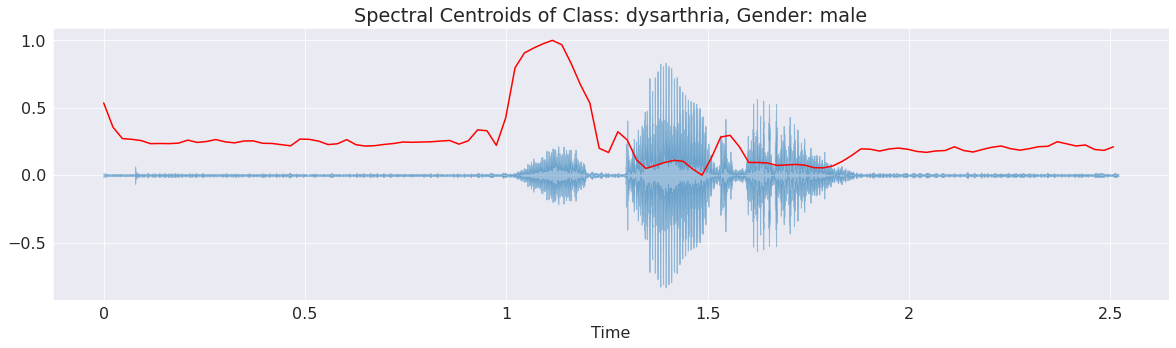

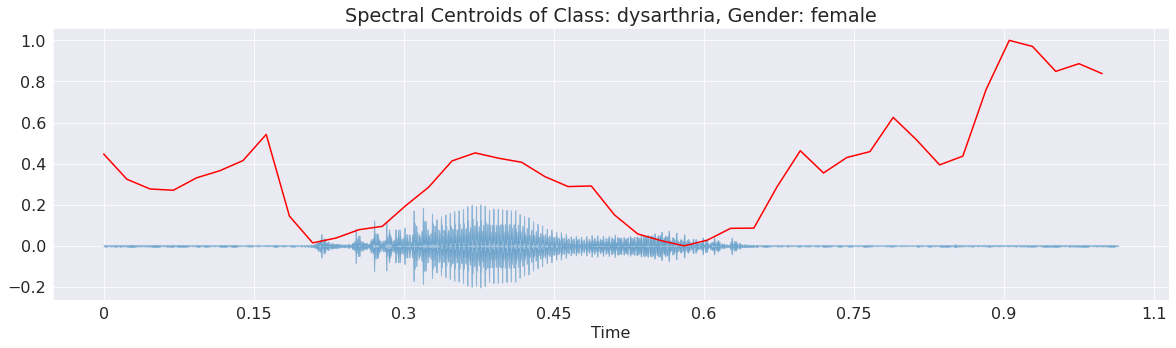

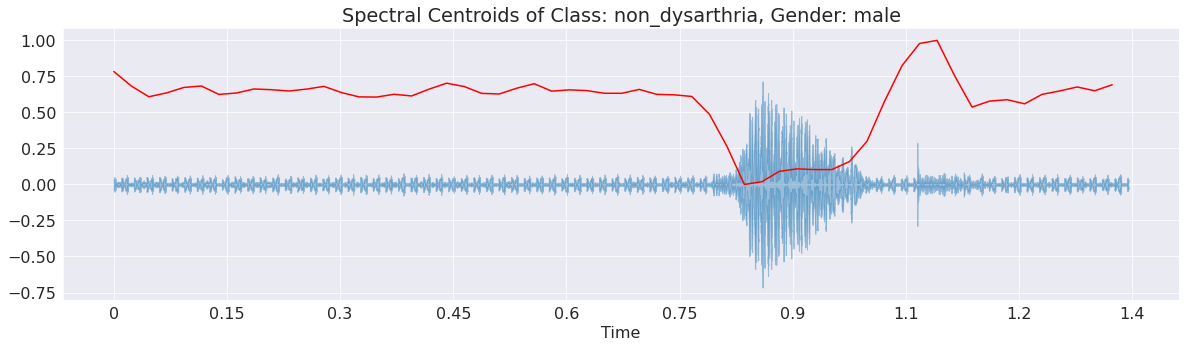

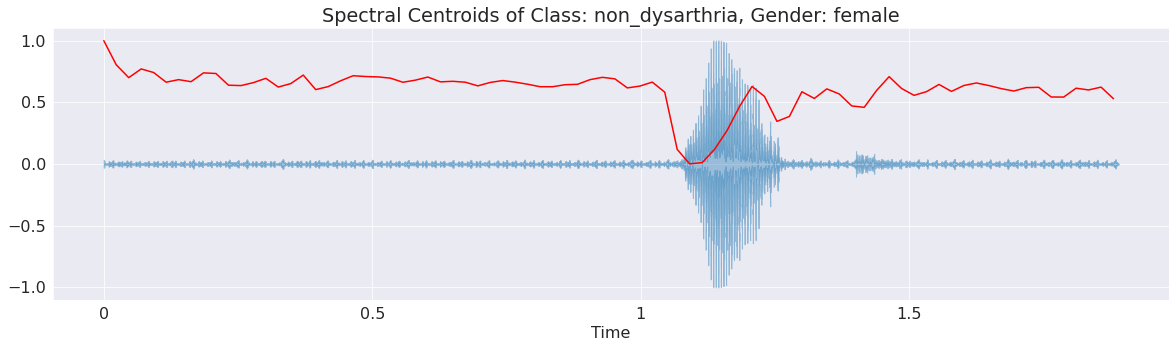

In [12]:
show_spectral_centroids(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_spectral_centroids(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_spectral_centroids(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_spectral_centroids(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

## Spectral Rolloff

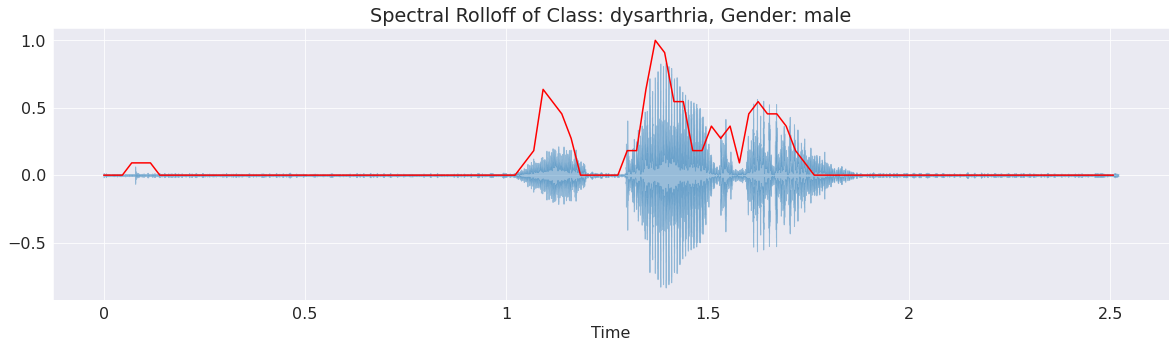

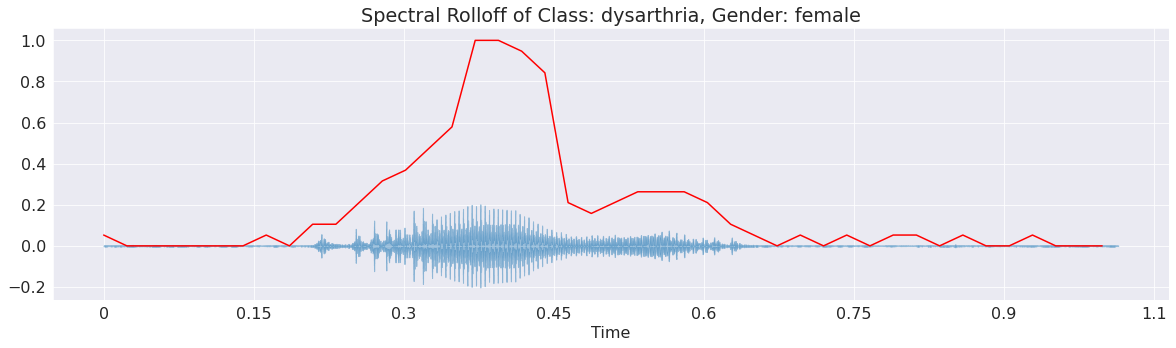

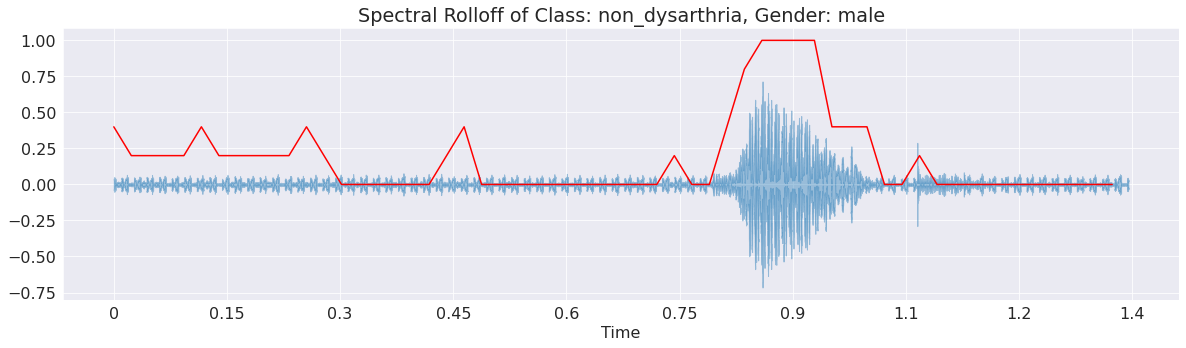

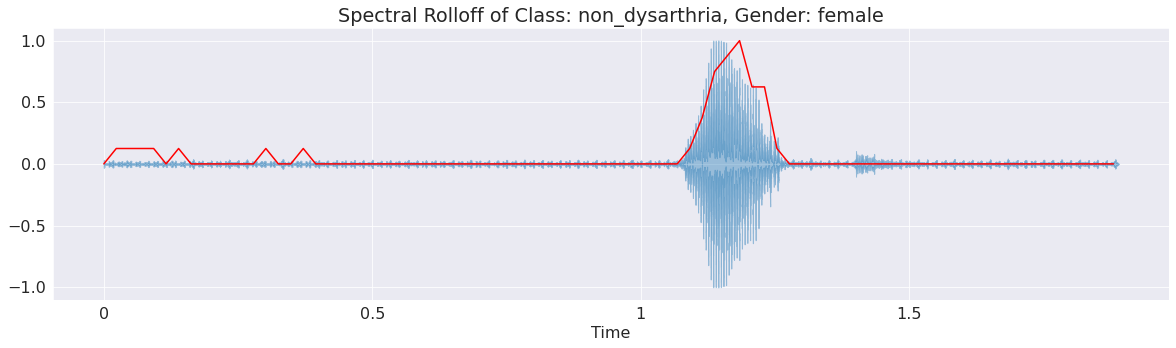

In [13]:
show_spectral_rolloff(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_spectral_rolloff(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_spectral_rolloff(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_spectral_rolloff(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

## MFCCs


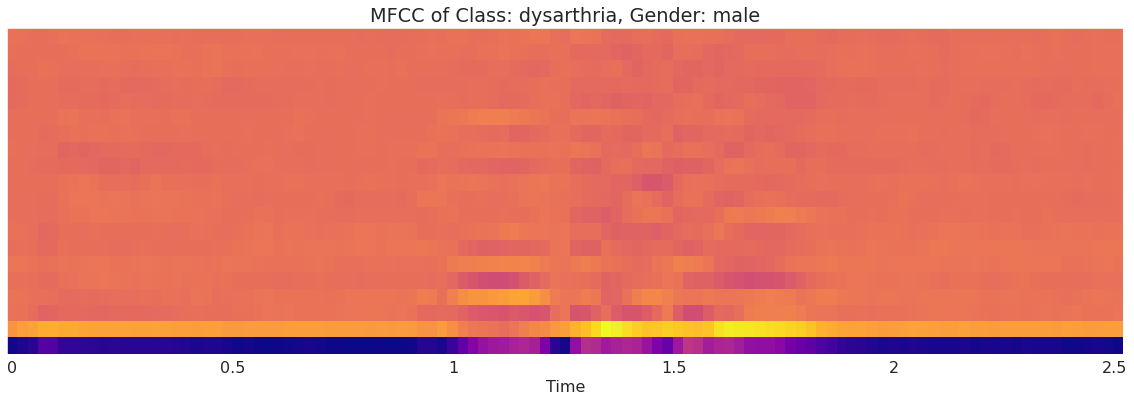

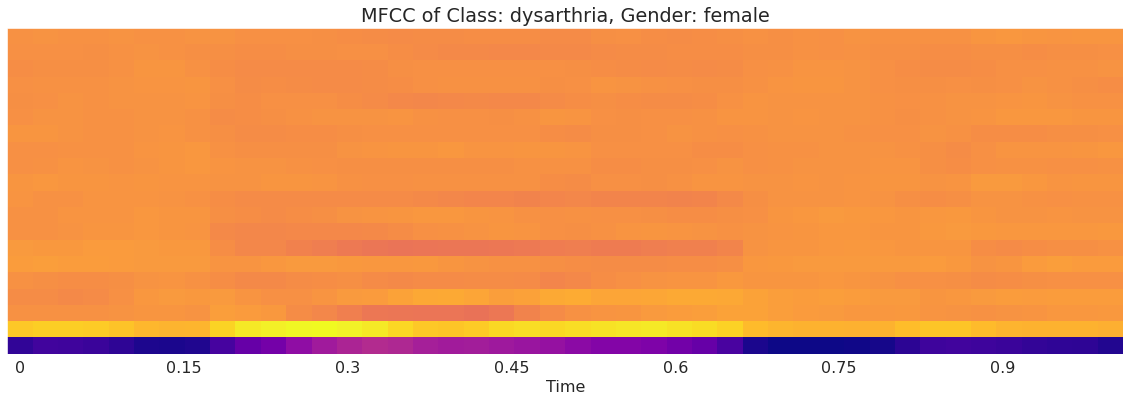

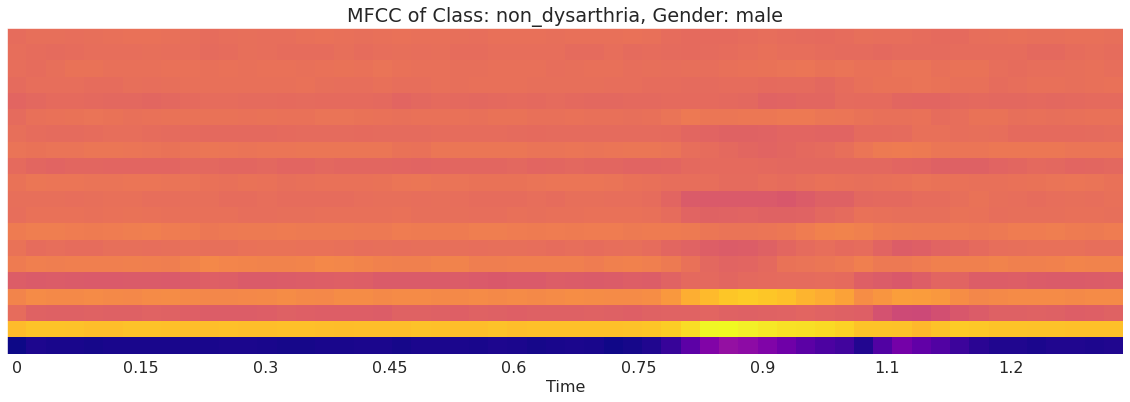

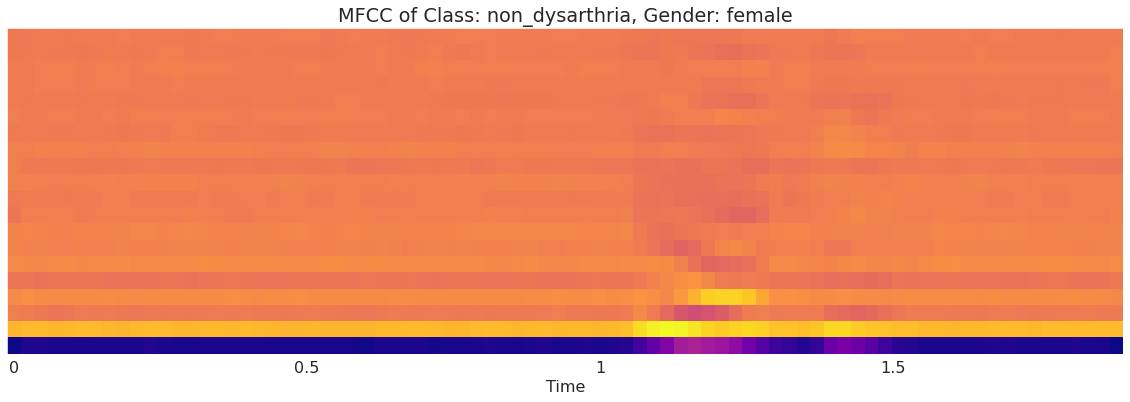

In [14]:
show_mfccs(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_mfccs(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_mfccs(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_mfccs(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

## Mel Spectrogram
 

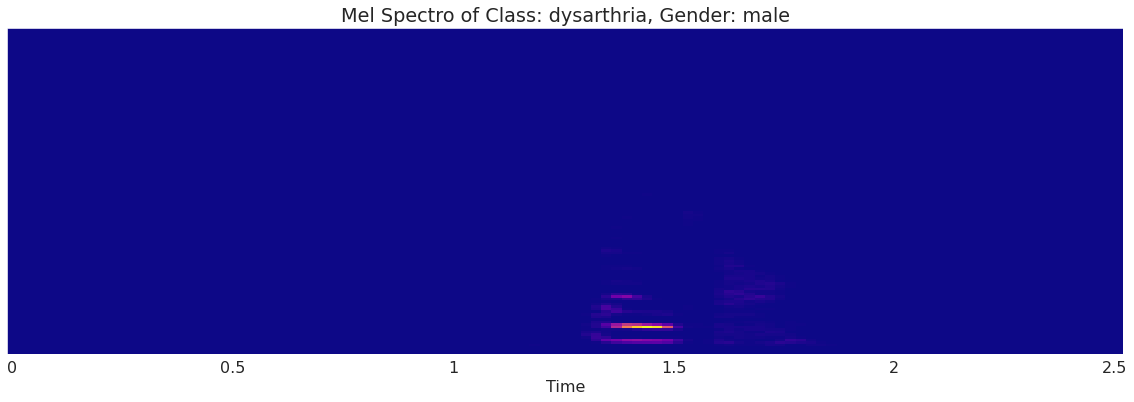

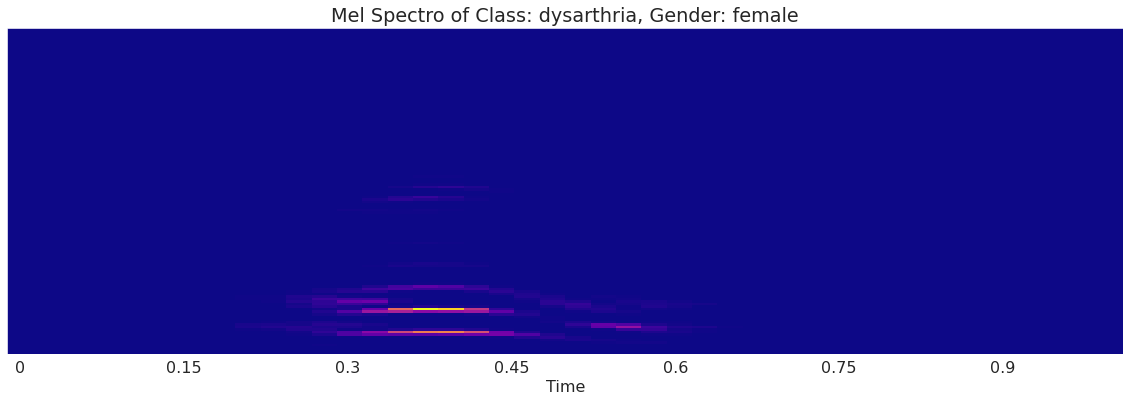

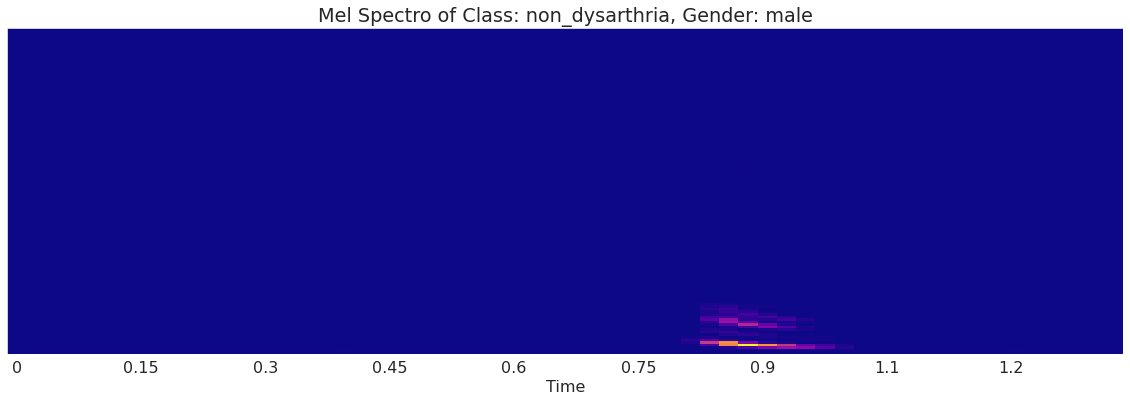

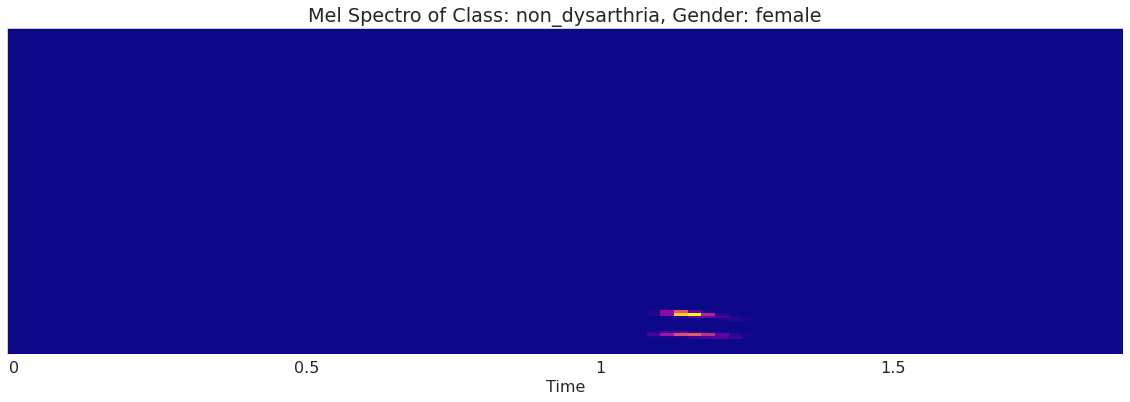

In [15]:
show_melspectro(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_melspectro(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_melspectro(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_melspectro(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

# Feature Extraction


In [16]:
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score

In [17]:
def feature_extraction(df):
    features = []
    for i,record in tqdm(df.iterrows(),total=df.shape[0]):
        try:
            x , sr = librosa.load(record['filename'])
            mean_mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128),axis=1)
            features.append(mean_mfcc)
        except EOFError:
            pass
        
    dataf = pd.DataFrame(features)
    dataf['class'] = df['is_dysarthria']
    return dataf

In [18]:
dataf = feature_extraction(data)

100%|██████████| 2000/2000 [07:38<00:00,  4.36it/s]


In [19]:
dataf

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,class
0,-222.457077,102.146935,-17.265686,38.949039,-13.736136,20.581657,-5.038507,9.669348,2.852035,-1.724100,...,0.959738,0.782641,0.988810,0.482095,-0.025945,0.654508,0.499423,0.240431,-0.257057,non_dysarthria
1,-300.215210,110.792397,-17.835419,39.316513,-17.007551,22.735220,2.369241,17.929928,4.389093,3.490597,...,1.091978,0.965665,1.435454,-0.224936,-1.078653,-0.329877,0.278370,-0.274176,-0.642529,non_dysarthria
2,-303.913361,113.325172,-24.710556,45.542671,-22.632982,26.017168,1.537213,17.134033,5.634882,3.570631,...,0.793990,0.478094,1.164105,-0.163656,-1.209489,0.024640,0.433807,-0.406458,-0.485287,non_dysarthria
3,-211.974976,117.983017,-36.248325,38.447906,-27.372046,25.304882,-6.710573,11.927542,0.885225,2.587593,...,0.547349,0.990486,0.629700,0.259464,-0.164846,0.062285,0.314661,-0.045342,-0.274535,non_dysarthria
4,-281.211090,105.812836,-18.269186,45.741081,-15.748901,27.830769,-2.712293,15.742901,5.896017,0.358894,...,1.533421,0.922572,0.878170,0.324768,0.115258,-0.145911,-0.038609,-0.655331,-0.362039,non_dysarthria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,-304.561401,115.796066,-1.147701,26.770647,-0.757051,13.096489,2.627126,3.931506,-0.938713,-3.080619,...,0.448663,0.153010,0.244165,0.094611,-0.138421,0.272110,0.265663,0.062699,-0.247763,dysarthria
1995,-458.009277,110.334679,22.025970,0.062627,-11.206986,3.119710,-4.342128,4.252670,6.066456,-2.170707,...,0.626071,0.484599,0.440195,0.401546,0.409377,0.226709,0.203481,-0.091866,0.021844,dysarthria
1996,-371.707428,117.062241,5.491239,22.597092,8.194892,7.680684,9.125202,9.802479,4.609561,3.364675,...,0.226508,-0.020404,0.015430,-0.066805,-0.199373,0.489964,0.809572,-0.329458,-0.373760,dysarthria
1997,-302.861511,112.991661,-4.898696,32.754093,-1.607929,4.021253,4.864986,9.357003,-2.490314,-3.998960,...,0.125244,-0.171940,0.354822,0.195992,-0.417778,0.448446,1.017736,-0.065310,-0.120946,dysarthria


In [20]:
dataf.loc[dataf['class']=='non_dysarthria','class'] = 0.0
dataf.loc[dataf['class']=='dysarthria','class'] = 1.0
dataf['class'] = dataf['class'].astype(float)

X = dataf.iloc[:,:-1].values
y = dataf.iloc[:,-1]

In [21]:
X.shape, y.shape

((1999, 128), (1999,))

In [22]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
X_train, X_validation, y_train, y_validation = train_test_split(X_temp, y_temp, test_size=0.10, random_state=101)
X_train = X_train.reshape(-1,16,8,1)
X_test = X_test.reshape(-1,16,8,1)
X_validation = X_validation.reshape(-1,16,8,1)

# Modelling

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers.experimental.preprocessing import Resizing

# Resize the input images to match the original AlexNet input size (55x55)
model = Sequential([
    InputLayer(input_shape=(16, 8, 1)),
    Resizing(55, 55),  # Resize the input to 55x55
    
    # Convolutional Layer 1
    Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', padding="valid"),
    
    # MaxPooling Layer 1
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    
    # Resize the output of MaxPooling Layer 1 to 27x27
    Resizing(27, 27),
    
    # Convolutional Layer 2
    Conv2D(filters=256, kernel_size=(5, 5), activation='relu', padding="same"),
    
    # MaxPooling Layer 2
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    
    # Convolutional Layer 3
    Conv2D(filters=384, kernel_size=(3, 3), activation='relu', padding="same"),
    
    # Convolutional Layer 4
    Conv2D(filters=384, kernel_size=(3, 3), activation='relu', padding="same"),
    
    # Convolutional Layer 5
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding="same"),
    
    # MaxPooling Layer 3
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    
    Flatten(),
    
    # Fully Connected Layer 1
    Dense(4096, activation='relu'),
    Dropout(0.5),
    
    # Fully Connected Layer 2
    Dense(4096, activation='relu'),
    Dropout(0.5),
    
    # Output Layer
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 55, 55, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 12, 12, 96)        11712     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 5, 96)          0         
_________________________________________________________________
resizing_1 (Resizing)        (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
model_name = "new_model.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

In [27]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation,y_validation), callbacks=[checkpoint,earlystopping])

Epoch 1/50
48/48 [==============================] - 82s 2s/step - loss: 1.2449 - accuracy: 0.6122 - val_loss: 0.6581 - val_accuracy: 0.5706

Epoch 00001: val_loss improved from inf to 0.65810, saving model to new_model.h5
Epoch 2/50
48/48 [==============================] - 79s 2s/step - loss: 0.5551 - accuracy: 0.7188 - val_loss: 0.5075 - val_accuracy: 0.7588

Epoch 00002: val_loss improved from 0.65810 to 0.50751, saving model to new_model.h5
Epoch 3/50
48/48 [==============================] - 79s 2s/step - loss: 0.5110 - accuracy: 0.7475 - val_loss: 0.4613 - val_accuracy: 0.7647

Epoch 00003: val_loss improved from 0.50751 to 0.46127, saving model to new_model.h5
Epoch 4/50
48/48 [==============================] - 79s 2s/step - loss: 0.4258 - accuracy: 0.7999 - val_loss: 0.3916 - val_accuracy: 0.7765

Epoch 00004: val_loss improved from 0.46127 to 0.39157, saving model to new_model.h5
Epoch 5/50
48/48 [==============================] - 81s 2s/step - loss: 0.3729 - accuracy: 0.8371 - 

In [28]:
import shutil
# Move the model_simple.h5 file to the /kaggle/working directory
shutil.move(model_name, '/kaggle/working/' + model_name)

'/kaggle/working/new_model.h5'

# Model Summary


## Learning Curves

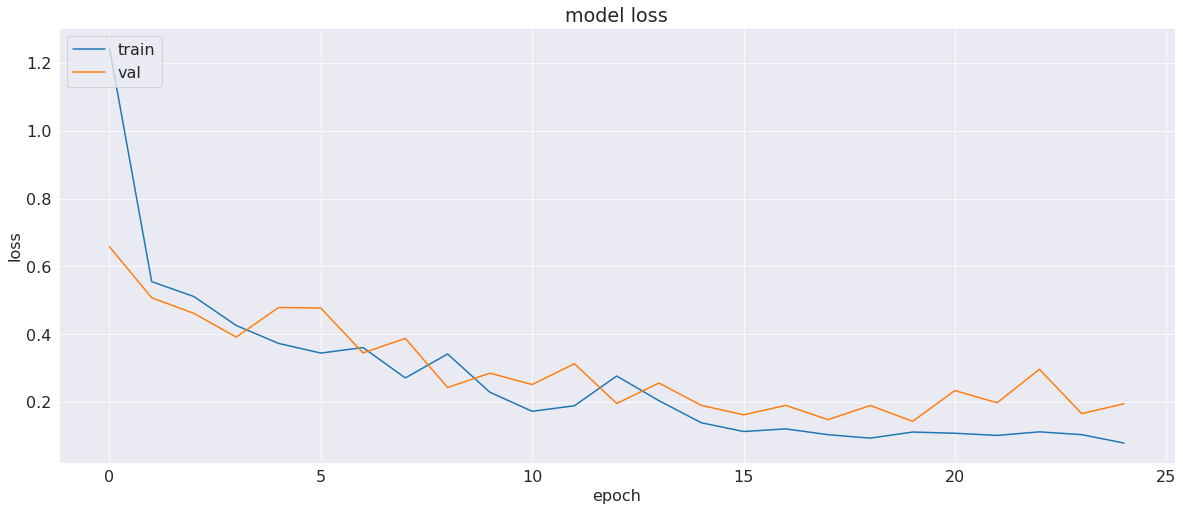

In [29]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

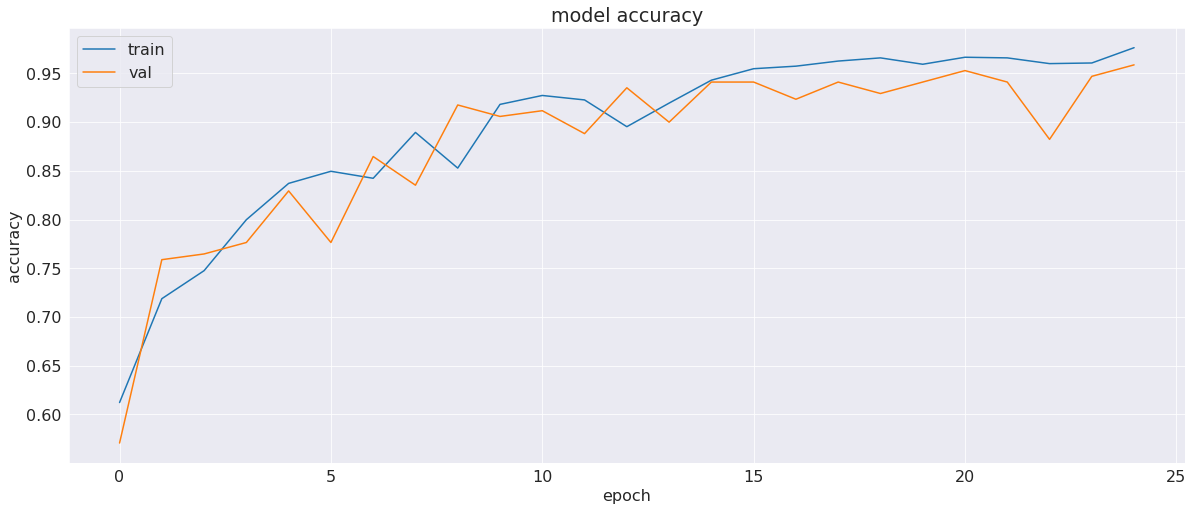

In [30]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [31]:
y_pred = model.predict(X_test)

## ROC Curve and AUC Score


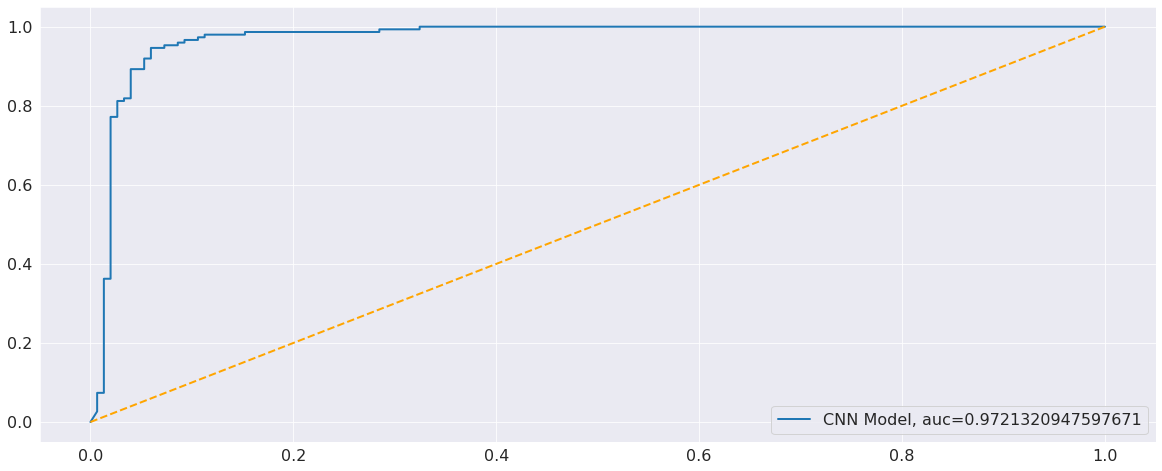

In [32]:
plt.figure(figsize=(20,8))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="CNN Model, auc="+str(auc),lw=2)
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.legend(loc=4)
plt.show()

In [34]:
y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0

## Confusion Matrix
- Only 1 misclassification from each class is observed
- Upon running the model several times the performance still remains the same

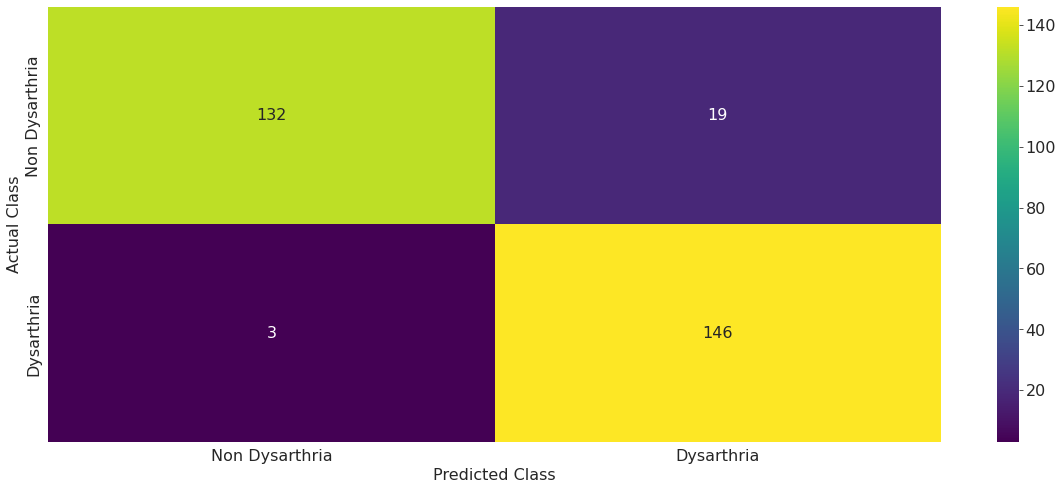

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## Classification Report


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92       151
         1.0       0.88      0.98      0.93       149

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [37]:
from sklearn.metrics import accuracy_score
print("Recall Score of the Model: ",recall_score(y_test,y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model: ", accuracy)

Recall Score of the Model:  0.9798657718120806
Accuracy of the model:  0.9266666666666666
